# Happy Customers - Problem Statement
***

**Background:**

ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

**Data Description:**

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

**Goal(s):**

Predict if a customer is happy or not based on the answers they give to questions asked.

**Success Metrics:**

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

**Bonus(es):**

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

**Submission Instructions:**

Project should be implemented with Python
Please name your repository on GitHub with this name without exposing your project information: oD9uReDfdQZnxZyR

# 1. Data Import
***
First step in any problem is to import the necessary packages and source the data.

In [1]:
#load python packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# 2. Data Wrangling and Initial Exploration
***
I want to learn more about the data to get a sense of what I'm working with.  The goal here is to understand if there are any major data issues that I need to address. 

In [5]:
df.shape

(126, 7)

In [6]:
#Min and Max of each feature is 1 and 5, respectively.  This is required to make sure there aren't values outside this range.  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


In [7]:
# Looking for null values.  If nothing is returned, then there are no NaN entries.
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


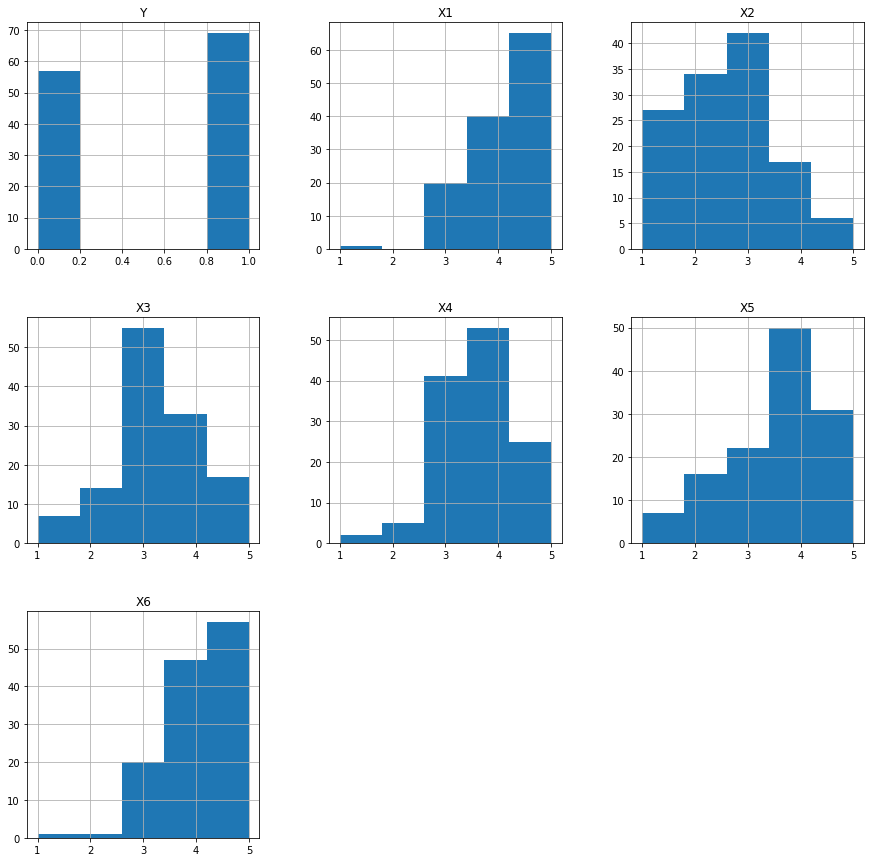

In [8]:
#General historgram of each column.  
#Important take aways:
# 1. Target variable looks to be fairly balanced with more about 15 or so more happy customers (1) than unhappy (0)
# 2. Some features are more normally distributed around 3, some are skewed right or left.  

hist = df.hist(bins=5,figsize =(15,15))

In [9]:
# Because we are working with ordinal data (all the features are categorial in nature).
# I want to understand how the features correlate to the Target (Y) using the pearson correlation coeficient.

df.corr()

# Feature X2 has almost zero correlation to the Target data.  Looking at the X2 question, "Content of my order is as I expected"
# I suspect that X2 is a canidate for removal from the data set.  X4, also has a very low correlation, but I will leave it in for now.

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


# 3. Exploratory Data Analysis
***
Time for a deeper dive into the data to understand feature important and try to discover any important trends.


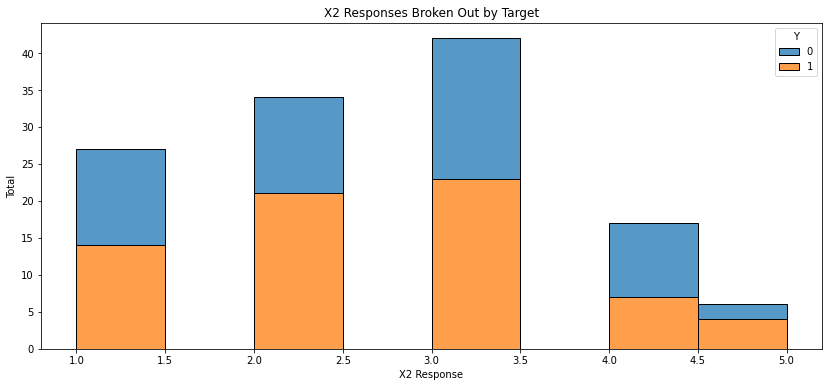

In [13]:
# I want to take a closer look at X2.  A histogram of the X2 feature broken out by target (Y) is below.  

plt.figure(figsize = (14,6))
ax = sns.histplot(x="X2", data=df, hue='Y'
                  , stat = 'count'
                 ,  multiple='stack', binwidth=.5)
ax.set(xlabel='X2 Response', ylabel='Total', title='X2 Responses Broken Out by Target')
plt.show()

# Looking at the distribution two things that are important is that as X2 response increases 
# the proportion of 1 to 0 in the target does not increase.  Meaning - Of the people who voted '4' on X2, the majority are unhappy.
# There is also a higher proportion of 2 responses that are happpy than 3 responses.  
# This feature is counter productive for our purposes.  
# Something with the way the question is phrased does not lead to useful responses in relation to Y




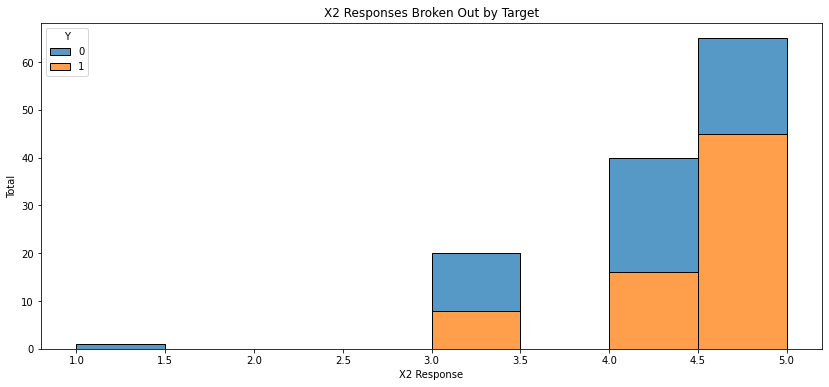

In [14]:
# Let's compare X2 with a feature that correlates better to the target.  Below is a histogram of X1.

plt.figure(figsize = (14,6))
ax = sns.histplot(x="X1", data=df, hue='Y'
                  , stat = 'count'
                 ,  multiple='stack', binwidth=.5)
ax.set(xlabel='X2 Response', ylabel='Total', title='X2 Responses Broken Out by Target')
plt.show()

# As X1 response increases the proportion of happy customers also increases.  Which is helpful for our purposes.  

In [15]:
# At this point I need to remove X2 from my analysis.  

df = df.drop('X2', axis=1)

## 3.1 Feature Creation
***

These survey results are only responses.  We don't have any demographic data.  One of the problems with this kind of data is that evey person has their own metric for when they are "unhappy".  Example:  I might give a '3' and be unhappy, when another person give as '1'.  To try to alliviate this problem I want to create features that look at the responses as a whole, not individually.  

I'm going to create the following features:  
- 1.  Sum total of responses
- 2.  Number of responses below 3 (num_low)
- 3.  Number of responses above 3 (num_high)
- 4.  Range from lowest to highest 
- 5.  Average response
- 6.  Average response zscore
- 7.  Buckets/cut of the total 



In [16]:
col_list= list(df)
col_list.remove('Y')

In [17]:
# Creating the total of each record
# I want to understand if higher overall totals lead to a greater proportion of Happy customers
df['total']=df.loc[:,col_list].sum(axis=1)

In [18]:
# Creating the total Number of Low responses (<3) for a record
# I want to understand if having more low responses lead to a greater number of unhappy customers
df['num_low'] = df[df[col_list] <= 2].count(axis = 1) 

In [19]:
# Creating the total Number of High responses (>3) for a record
# I want to understand if having more high responses lead to a greater number of Happy customers
df['num_high'] = df[df[col_list] >= 4].count(axis = 1) 

In [20]:
# Creating the Range of values from high to low
# Using this feature I want to understand if having a higher ranges (which implies a low and high score) leads to a happy or unhappy customer
df['range'] = df[col_list].max(axis=1) - df[col_list].min(axis=1)

In [21]:
# Creating the average of scores for a record
# I want to understand if a higher average leades to a happy customer
df['average']=df.loc[:,col_list].mean(axis=1)

In [22]:
# Creating the a z-score from the average column to understand how many standard deviations away the average is from the overall average
# Do records with averages farther away from the average score result in happy or unhappy customers
df['avg_zscore'] = (df['average'] - df['average'].mean())/df['average'].std(ddof=0)

In [23]:
# Creating a category feature using total response score to bucket records into Low, Medium, and High totals.

cut_labels = ['low_total', 'medium_total', 'high_total']
cut_bins = [1, 16, 20, 25]
df['total_cut'] = pd.cut(df['total'], bins=cut_bins, labels=cut_labels)


# These buckets were established by looking at the below histogram on total responses.  



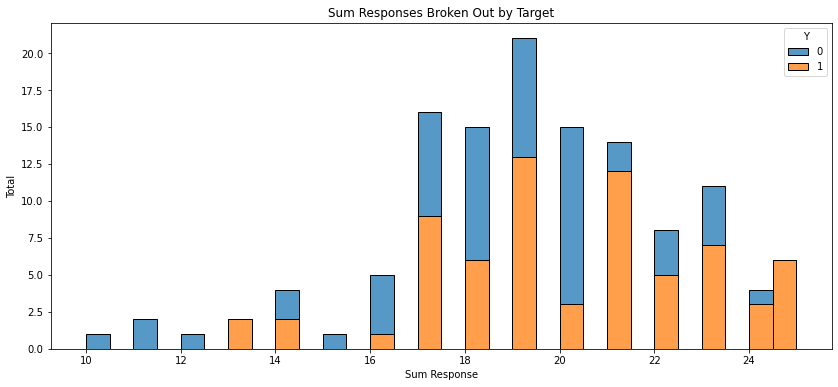

In [24]:
plt.figure(figsize = (14,6))
ax = sns.histplot(x="total", data=df, hue='Y'
                  , stat = 'count'
                 ,  multiple='stack', binwidth=.5)
ax.set(xlabel='Sum Response', ylabel='Total', title='Sum Responses Broken Out by Target')
plt.show()

# Totals 16 and lower - the majority of responses are unhappy
# Totals 21 and Higher - the majority of responses are happy
# Totals between 17 and 20 - the is no clear correlation

# Creating a clear 3 value categorical column for Low, Medium, and High totals gives the models a boost

In [25]:
#Looking at the features selected below to make sure everything looks correct

df.head()

,Y,X1,X3,X4,X5,X6,total,num_low,num_high,range,average,avg_zscore,total_cut
0,0,3,3,4,2,4,16,1,2,2,3.2,-1.069883,low_total
1,0,3,3,5,4,3,18,0,2,2,3.6,-0.420219,medium_total
2,1,5,3,3,3,5,19,0,2,2,3.8,-0.095387,medium_total
3,0,5,3,3,3,5,19,0,2,2,3.8,-0.095387,medium_total
4,0,5,3,3,3,5,19,0,2,2,3.8,-0.095387,medium_total


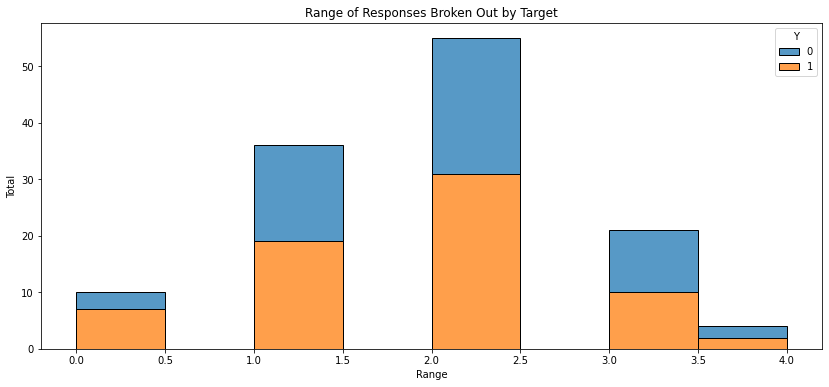

In [28]:


plt.figure(figsize = (14,6))
ax = sns.histplot(x="range", data=df, hue='Y'
                  , stat = 'count'
                 ,  multiple='stack', binwidth=.5)
ax.set(xlabel='Range', ylabel='Total', title='Range of Responses Broken Out by Target')
plt.show()

# One interesting thing with range is that at a range of 0, the majority of customers are happy.

In [ ]:
# At this point i believe our features represent the data better and contribute more useful information than the raw data itself.  
# Remember everyone's "3" or "5" is different so why would this data be useful for modeling purposes.  


# 4. Data Modeling
***

Notes on Data Modeling:
1.  I use pycaret (low code modeling library that uses scikit learn to build quick analysis) for fast iterative modeling
2.  I use an iterative style to add and remove features to see how certain features perform affect the model 
3.  I ran many iterations of various features to get to the following model


In [29]:
# import pycaret's classification library
from pycaret.classification import *


In [30]:
#Setup pycaret's model data using only created features (no raw data)

cols = ['Y','num_high', 'num_low', 'range', 'average', 'total', 'total_cut', 'avg_zscore']
exp_reg = setup(data = df[cols], target = 'Y', session_id=100, numeric_features = ['total', 'num_high', 'num_low', 'range'])

Setup Succesfully Completed!


,Description,Value
0,session_id,100
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(126, 8)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
# Create a Category boost model
# Pycaret uses 10 fold CV to create the model
# Initial results is an accuracy of .79 - above the .73 threshold in the problem statement.  

cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9000,0.8000,1.0000,0.8889,0.7805,0.8000
1,0.7778,0.9500,0.8000,0.8000,0.8000,0.5500,0.5500
2,0.7778,0.6000,0.8000,0.8000,0.8000,0.5500,0.5500
3,0.7778,0.8000,1.0000,0.7143,0.8333,0.5263,0.5976
4,0.3333,0.2000,0.4000,0.4000,0.4000,-0.3500,-0.3500
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,0.8000,0.8000,0.8000,0.8000,0.5500,0.5500
7,0.8889,0.7750,1.0000,0.8333,0.9091,0.7692,0.7906
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.7500,0.6875,0.7500,0.7500,0.7500,0.5000,0.5000


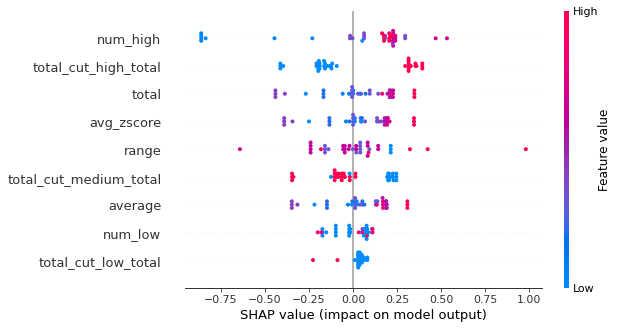

In [32]:
#plotting the catboost model's feature importance using a SHAP plot 

interpret_model(cat)

# For many of the features, as they increase or decrease, the impact on the model increases.  
# This is ideal for predicting the target response
# Most important features was the count of the number of high resonses and the high bucket total.  

In [ ]:
# Note:  I also tried using Random Forest, XgBoost, Logistric Regression - But the Category Boost model preformed the best.  


# 5. Conclusions

1.  X2 can be removed.  X2 negatively impacted model performance (not shown in this notebook) and does not correlate to the Target using a Pearson Correlation Coefficient.  
2.  When modeling, including the raw data leads to reduced performance (models that included the raw data are not included in this notebook).  
3.  Best model I was able to create had an accuracy score of .79.  I used a category boost model.  Tree based models also performed well and had accuracy scores over the threshold of .73, but they are not included in this notebook.   

## 5.1 Future Research

1.  Perform hyperparameter tuning on a range of different models
2.  Continue to create features on top of the raw data
3.  Remove X4 from the data and recalculate the engineered features
4.  Examine records with High totals but are unhappy (anomolies) to look for a trend